In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

In [29]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [30]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [31]:
from scipy import stats
#((stats.mode(dataset.Dependents)).mode)[0]
dataset=d
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset['Loan_Amount_Term'].fillna(((stats.mode(dataset.Loan_Amount_Term)).mode)[0],inplace=True)
dataset['Credit_History'].fillna(((stats.mode(dataset.Credit_History)).mode)[0],inplace=True)
dataset['Dependents'].fillna(((stats.mode(dataset.Dependents)).mode)[0],inplace=True)
dataset.dropna(how='any',inplace=True)

In [32]:
dataset.to_csv('loan-prediction2.csv',index=False)
dataset.shape

(566, 13)

In [33]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
print(X.shape,y.shape)

(566, 11) (566,)


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std=sc.transform(X)
X=X_std

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [35]:
#feature selection
#https://scikit-learn.org/stable/modules/feature_selection.html
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=5)
rfe = RFE(dt, 8)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True False  True  True  True  True  True  True]
[3 1 2 1 4 1 1 1 1 1 1]


In [36]:
X_new=rfe.fit_transform(X,y)

In [37]:
import pandas as pd
X_df=pd.DataFrame(X_new)
X_df.head()
X_df.to_csv('featured_X_dataframe1.csv',index=False)
X_df=pd.read_csv('featured_X_dataframe1.csv')
X=X_df
X.head()

,0,1,2,3,4,5,6,7
0,-1.373956,0.537860,0.108916,-0.630391,0.023287,0.268718,0.420375,1.224101
1,0.727825,0.537860,-0.125177,-0.028401,-0.205863,0.268718,0.420375,-1.318435
2,0.727825,0.537860,-0.417885,-0.630391,-0.977489,0.268718,0.420375,1.224101
3,0.727825,-1.859218,-0.494991,0.310916,-0.305428,0.268718,0.420375,1.224101
4,-1.373956,0.537860,0.136837,-0.630391,-0.044071,0.268718,0.420375,1.224101


In [38]:
X_std=X
X_std.head()

,0,1,2,3,4,5,6,7
0,-1.373956,0.537860,0.108916,-0.630391,0.023287,0.268718,0.420375,1.224101
1,0.727825,0.537860,-0.125177,-0.028401,-0.205863,0.268718,0.420375,-1.318435
2,0.727825,0.537860,-0.417885,-0.630391,-0.977489,0.268718,0.420375,1.224101
3,0.727825,-1.859218,-0.494991,0.310916,-0.305428,0.268718,0.420375,1.224101
4,-1.373956,0.537860,0.136837,-0.630391,-0.044071,0.268718,0.420375,1.224101


In [39]:
from sklearn.model_selection import train_test_split
X_train_std,X_test_std,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=2017)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

In [40]:
#learning curve plotter
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [41]:
#cross validation and accuracy measures
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

Test set score svm_cls: 0.800000
Classification report for on test:
              precision    recall  f1-score   support

           0       0.74      0.43      0.54        47
           1       0.81      0.94      0.87       123

   micro avg       0.80      0.80      0.80       170
   macro avg       0.78      0.68      0.71       170
weighted avg       0.79      0.80      0.78       170


Confusion matrix for svm_cls_rbf on test:
[[ 20  27]
 [  7 116]]
5 fold cross validation
[0.80701754 0.71052632 0.81578947 0.8125     0.76785714] 0.7827380952380952


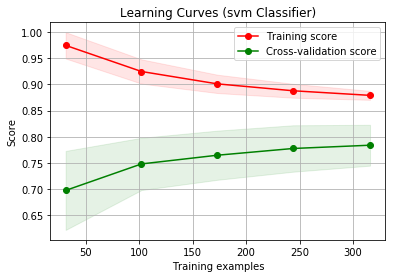

In [42]:
#support vector machine
#https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm 
svm_cls = svm.SVC(gamma=0.05,C=100,kernel='rbf')
svm_cls.fit(X_train_std, y_train)

print("Test set score svm_cls: %f" % svm_cls.score(X_test_std, y_test))
print("Classification report for on test:\n%s\n"% (classification_report(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for svm_cls_rbf on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(svm_cls, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(svm_cls,"Learning Curves (svm Classifier)" , X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score dt: 0.635294
Classification report for dt on test:
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        47
           1       0.79      0.68      0.73       123

   micro avg       0.64      0.64      0.64       170
   macro avg       0.58      0.60      0.58       170
weighted avg       0.67      0.64      0.65       170


Confusion matrix for dt on test:
[[24 23]
 [39 84]]
5 fold cross validation
[0.71052632 0.64912281 0.78070175 0.79464286 0.76785714] 0.7405701754385965


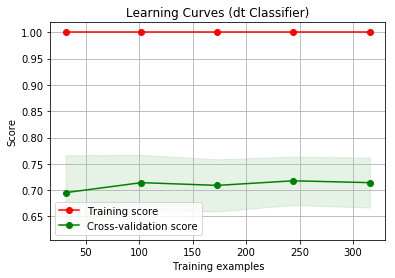

In [43]:
#dt
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',random_state=5)
dt.fit(X_train_std, y_train)

print("Test set score dt: %f" % dt.score(X_test_std, y_test))
print("Classification report for dt on test:\n%s\n"% (classification_report(y_test, dt.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(dt , X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(dt,"Learning Curves (dt Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


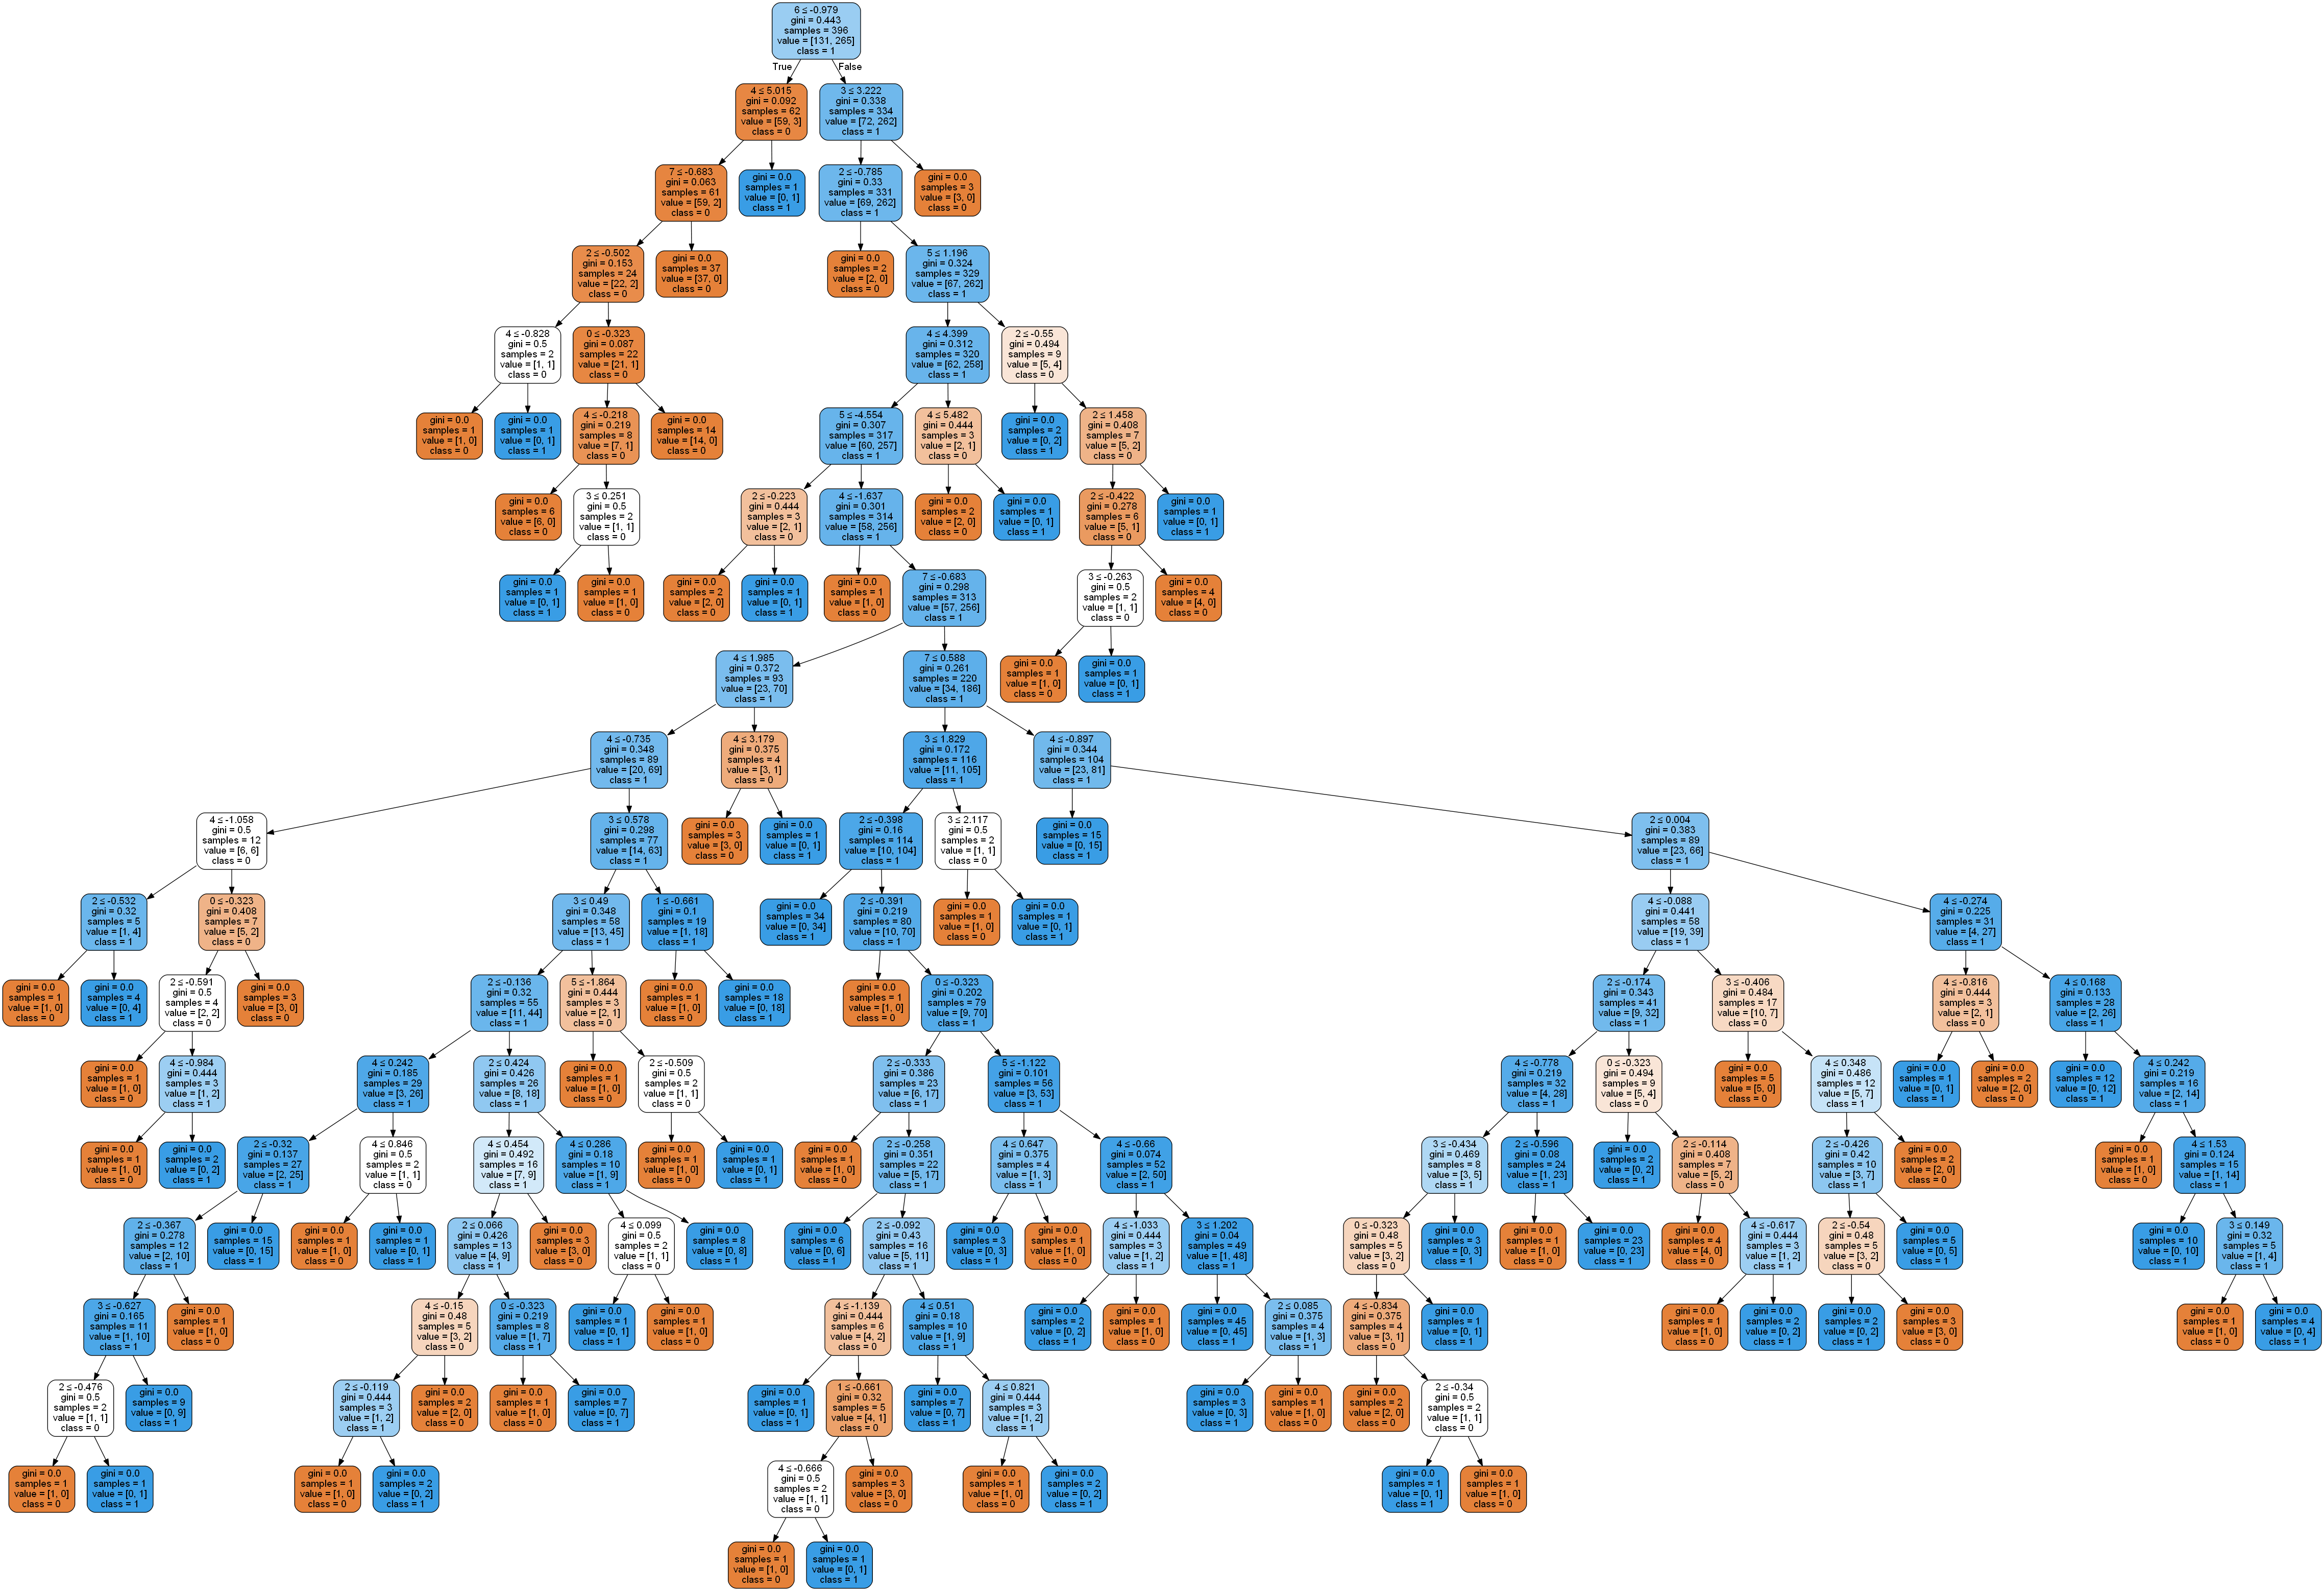

In [44]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree.pdf") 
Image(graph.create_png())

Test set score ada: 0.658824
Classification report for ada on test:
              precision    recall  f1-score   support

           0       0.41      0.51      0.45        47
           1       0.79      0.72      0.75       123

   micro avg       0.66      0.66      0.66       170
   macro avg       0.60      0.61      0.60       170
weighted avg       0.69      0.66      0.67       170


Confusion matrix for ada on test:
[[24 23]
 [35 88]]
5 fold cross validation
[0.69298246 0.66666667 0.77192982 0.78571429 0.79464286] 0.7423872180451128


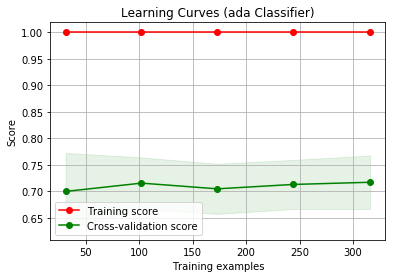

In [45]:
#ada-booster #boosting
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
ada.fit(X_train_std, y_train)

print("Test set score ada: %f" % ada.score(X_test_std, y_test))
print("Classification report for ada on test:\n%s\n"% (classification_report(y_test, ada.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(ada , X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(ada,"Learning Curves (ada Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()